In [1]:
%run common_init.py

Start import
Host: DESKTOP-URE1BBI.localdomain
Setting tmp folder to /tmp/
calculating effective efficiency for Xe detector done
calculating effective efficiency for Ge detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Xe_migd detector done
calculating effective efficiency for Ge_migd detector done
calculating effective efficiency for Ar_migd detector done
Done import
SYSTEM
	Running on linux
	Python version 3.7.6 (default, Jan  8 2020, 19:59:22) [GCC 7.3.0]
	Python installation /home/joran/miniconda3/envs/dddm/bin/python
MODULES
	DirectDmTargets
		ver.:	0.2.0
		Path:	/mnt/d/Google_Drive/PhD-master/ubuntu-storage/windows-anaconda/DD_DM_targets/DirectDmTargets/

	wimprates
		ver.:	0.3.2
		Path:	/mnt/d/Google_Drive/PhD-master/ubuntu-storage/windows-anaconda/forked_wimprates/wimprates/



# Direct detection of Dark matter using different target materials #

Author:

Joran Angevaare <j.angevaare@nikef.nl>

Date:

14 october 2019 

## Goal ## 

- Roughly reproduce <https://journals.aps.org/prd/abstract/10.1103/PhysRevD.83.083505>
- Update the results thereof with more recent knowledge of the DM-distribution

### Approach ###
To achieve these goals, we must first get a decent recoil spectrum, that is flexible enough to have different astrophysical parameters. Further, it must also be flexible enough to be able to allow for different analytic functions to be added to the model. For instance, we must be able to incorporate the $\rm{SHM}^{++}$ as presented here <https://arxiv.org/abs/1810.11468>.

When we have a sufficiently flexible model, we want to add in the detector physics, we should therein incorporate at least the following parameters:
- target
  - material
  - cross-section
- threshold
- background
- cut efficiency  
- volume
- exposure

Finally we should perform the inference

In [2]:
from datetime import datetime

In [3]:
from pymultinest.solve import solve as multines_solve

In [4]:
stats = dddm.NestedSamplerStatModel('Xe')

StatModel::	2020-01-26T12:36
	initialized for Xe detector.See print(stat_model) for default settings


In [5]:
stats._log_probability_nested([0,0])

-253433.03504296293

In [6]:
time.time()

1580038592.4925947

In [7]:
from pymultinest.solve import solve

In [8]:
from __future__ import absolute_import, unicode_literals, print_function
import numpy
from numpy import pi, cos

In [9]:
# %time
# start_multi = time.time()

# result = solve(LogLikelihood=stats._log_probability_nestle, 
#       Prior=stats._log_prior_transform_nestle,
#       n_dims = 2,
#       outputfiles_basename = 'temp_res2',
#       verbose=True,
#      )
# end_multi = time.time()

In [10]:
stats2 = dddm.NestedSamplerStatModel('Xe')
stats2.sampler = 'multinest'
stats2.nlive = 10
stats2.verbose = 0
stats2.config['save_intermediate'] = True

StatModel::	2020-01-26T12:36
	initialized for Xe detector.See print(stat_model) for default settings


In [11]:
stats2.save_results()

run_multinest::	2020-01-26T12:36
	start_fit for 2 parameters
open_save_dir::	using /tmp/multinest0/
  analysing data from /tmp/multinest0/multinest.txt
get_result_folder::	requested folder is /mnt/c/Users/Joran/dddm_data/results/
open_save_dir::	using /mnt/c/Users/Joran/dddm_data/results/nested_multinest0/
run_multinest::	2020-01-26T12:36
	fit_done in 17 s (0.0 h)
NestedSamplerStatModel::	2020-01-26T12:36
	getting the summary (or at least trying) let's first see if I did run
parameter values:
       log_mass : 1.707 +- 0.033
	 mass 51 +/- 3.8
log_cross_section : -45.007 +- 0.026
	 cross_section 9.84e-46 +/- 6e-47
save_results::	{now()}
	done_saving


In [12]:
for a in stats2.result.keys():
    print(a + 'a')

logZa
logZerra
samplesa


In [13]:
fit_summary = stats2.get_summary()
fit_summary

NestedSamplerStatModel::	2020-01-26T12:36
	getting the summary (or at least trying) let's first see if I did run
parameter values:
       log_mass : 1.707 +- 0.033
	 mass 51 +/- 3.8
log_cross_section : -45.007 +- 0.026
	 cross_section 9.84e-46 +/- 6e-47


{'log_mass_fit_res': ' 1.71 +/-  0.03',
 'mass_fit_res': '51 +/- 3.8',
 'log_cross_section_fit_res': '-45.01 +/-  0.03',
 'cross_section_fit_res': '9.84e-46 +/- 6e-47'}

In [14]:
for x in stats2.result.keys():
    print((x))

logZ
logZerr
samples


In [15]:
resdict = {}
for name, col in zip(stats2.fit_parameters, stats2.result['samples'].transpose()):
                print('%15s : %.3f +- %.3f' % (name, col.mean(), col.std()))
                # TODO
                #  add weights?
                resdict[name + "_fit_res"] = ("{0:5.2f} +/- {1:5.2f}".format(col.mean(),col.std()))
                if "log_" in name:
                    resdict[name[4:] + "_fit_res"] = "%.3g +/- %.2g" % (10 ** col.mean(), 10 ** (col.mean()) * np.log(10) * col.std())
                    print('\t', name[4:], resdict[name[4:] + "_fit_res"])

       log_mass : 1.707 +- 0.033
	 mass 51 +/- 3.8
log_cross_section : -45.007 +- 0.026
	 cross_section 9.84e-46 +/- 6e-47


In [16]:
resdict

{'log_mass_fit_res': ' 1.71 +/-  0.03',
 'mass_fit_res': '51 +/- 3.8',
 'log_cross_section_fit_res': '-45.01 +/-  0.03',
 'cross_section_fit_res': '9.84e-46 +/- 6e-47'}

In [17]:
start_nestle = time.time()
stats2.run_multinest()
end_nestle = time.time()

run_multinest::	2020-01-26T12:36
	start_fit for 2 parameters
open_save_dir::	using /tmp/multinest0/
  analysing data from /tmp/multinest0/multinest.txt
get_result_folder::	requested folder is /mnt/c/Users/Joran/dddm_data/results/
open_save_dir::	using /mnt/c/Users/Joran/dddm_data/results/nested_multinest1/
run_multinest::	2020-01-26T12:37
	fit_done in 12 s (0.0 h)


In [18]:
stats2.result

{'logZ': -24.55655338635661,
 'logZerr': 0.8343842035010569,
 'samples': array([[  1.81137426, -44.97271057],
        [  1.72017649, -45.06261514],
        [  1.79414705, -45.02649046],
        [  1.78571095, -45.02936711],
        [  1.76027229, -45.04440586],
        [  1.67841944, -45.03740859],
        [  1.68498582, -45.03844651],
        [  1.7668348 , -45.00002766],
        [  1.74568834, -45.03351289],
        [  1.68556566, -45.02957405],
        [  1.68556566, -45.02957405],
        [  1.70025883, -45.03421944],
        [  1.70025883, -45.03421944],
        [  1.74981787, -45.00454891],
        [  1.74981787, -45.00454891],
        [  1.73979715, -44.99228523],
        [  1.73979715, -44.99228523],
        [  1.72805284, -45.0284213 ],
        [  1.72805284, -45.0284213 ],
        [  1.6744647 , -45.01259498],
        [  1.6744647 , -45.01259498],
        [  1.74340571, -45.00743365],
        [  1.71200262, -45.02919535],
        [  1.71200262, -45.02919535],
        [  1.739

In [19]:
end_nestle - start_nestle

12.288913011550903

In [20]:
stats2.get_summary()

NestedSamplerStatModel::	2020-01-26T12:37
	getting the summary (or at least trying) let's first see if I did run
parameter values:
       log_mass : 1.719 +- 0.031
	 mass 52.3 +/- 3.7
log_cross_section : -45.016 +- 0.016
	 cross_section 9.64e-46 +/- 3.6e-47


{'log_mass_fit_res': ' 1.72 +/-  0.03',
 'mass_fit_res': '52.3 +/- 3.7',
 'log_cross_section_fit_res': '-45.02 +/-  0.02',
 'cross_section_fit_res': '9.64e-46 +/- 3.6e-47'}

In [21]:
%run common_init.py

Start import
Done import
SYSTEM
	Running on linux
	Python version 3.7.6 (default, Jan  8 2020, 19:59:22) [GCC 7.3.0]
	Python installation /home/joran/miniconda3/envs/dddm/bin/python
MODULES
	DirectDmTargets
		ver.:	0.2.0
		Path:	/mnt/d/Google_Drive/PhD-master/ubuntu-storage/windows-anaconda/DD_DM_targets/DirectDmTargets/

	wimprates
		ver.:	0.3.2
		Path:	/mnt/d/Google_Drive/PhD-master/ubuntu-storage/windows-anaconda/forked_wimprates/wimprates/



In [22]:
stats3 = dddm.NestedSamplerStatModel('Xe')

stats3.nlive = 200
stats3.verbose = 1
stats3.sampler = 'multinest'

StatModel::	2020-01-26T12:37
	initialized for Xe detector.See print(stat_model) for default settings


In [23]:
start_nestle = time.time()
stats3.run_multinest()
end_nestle = time.time()

NestedSamplerStatModel::	2020-01-26T12:37
	We made it to my core function, lets do that optimization
NestedSamplerStatModel::	2020-01-26T12:37
	here we go! We are going to fit:
	2 parameters

run_multinest::	2020-01-26T12:37
	start_fit for 2 parameters
NestedSamplerStatModel::	2020-01-26T12:37
	beyond this point, there is nothing I can say, you'll have to wait for my lower level algorithms to give you info, see you soon!
open_save_dir::	using /tmp/multinest0/
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 242.39496162074343, sig = 1.0805151186191512e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 10.05137845828067, sig = 4.327854671674921e-46, halo model = shm and detector = {'m

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 57.461102031734235, sig = 4.319748568543661e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 3.3723862579221153, sig = 1.2164431840132824e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 78.67287090950715, sig = 8.810516396470146e-43, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 1.7833684614457865, sig = 5.97423511907776e-43, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 30.430940747861722, sig = 5.827169220624359e-43, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 1.2859880819249083, sig = 1.4562650703249362e-43, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 1.9259048047595513, sig = 1.1709379923932905e-43, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 3.5265900538413972, sig = 1.3721318924828165e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 1.6191011751905087, sig = 4.656106130794054e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_re

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 1.9507738312785903, sig = 2.6110562900191452e-43, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 562.6880634107564, sig = 1.4899878462368589e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 113.24758879947673, sig = 8.527512652150506e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 163.67168892324003, sig = 2.8839066805907655e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 1.866794820218168, sig = 1.3826204077799466e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 61.734537106373246, sig = 1.6670271123057515e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_re

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 85.90994071990129, sig = 1.035987212731622e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 7.939876502114172, sig = 3.418012610305972e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 304.785422833124, sig = 1.1031897620043073e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe 

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 3.200597828747028, sig = 1.5819708779084488e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 7.757745460344356, sig = 3.9546919115454856e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 651.2954479352275, sig = 8.586132731670103e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 313.46845550197986, sig = 1.2710564499308848e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 856.0926551325501, sig = 3.966195599437123e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 44.857071541168175, sig = 5.2600595125203444e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 4.230520297609125, sig = 5.76776486804555e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 423.38777683193905, sig = 1.4025860091731336e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 10.717284632085727, sig = 1.2107348932538608e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 295.94486819025303, sig = 6.271905712961348e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 3.4705183253464504, sig = 1.9447046172152126e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 4.052285410947393, sig = 1.0021636679419387e-43, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 4.146991381961606, sig = 1.021780128710127e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 12.3513902142281, sig = 9.963646966483313e-43, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 1.347770735258211, sig = 3.1501712919690344e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe 

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 1.845427437839155, sig = 5.347574024186362e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 1.5974332695912905, sig = 1.2433278367023137e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 39.07098799832978, sig = 2.4428243829981673e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 580.0829871275938, sig = 3.810734332256428e-43, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 110.47956927796261, sig = 3.0854693159226004e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 84.59489143976855, sig = 4.720039850879332e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 9.288379834403193, sig = 1.2753697732915973e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.26198586658698, sig = 4.773184396841054e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 53.5010292553139, sig = 5.900872399118681e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe 

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 2.2329789252648196, sig = 3.7923190458317547e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 43.136779500064925, sig = 1.0451167318239303e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 161.32201000461106, sig = 7.547660996194454e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_re

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 17.554745025315917, sig = 7.406417991364081e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 16.363939725247374, sig = 5.410471855110329e-43, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 428.3102173634589, sig = 1.7266094893691733e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 12.397952093062909, sig = 1.93945544383402e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 60.22661883395226, sig = 1.1004711580203601e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:37
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 666.6205115032436, sig = 5.998898283364475e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 54.26261527103558, sig = 3.529019087889483e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 38.34559950029827, sig = 1.768883115099482e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 209.7607485923096, sig = 1.0193576845194252e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 214.75607218489415, sig = 6.8667273149397e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 350.90898078210125, sig = 6.210625187478492e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 179.4725911581934, sig = 1.9334052133403595e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 87.25329373155324, sig = 2.0324990016071043e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 197.39724933921786, sig = 1.579548239033983e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 687.9342851956275, sig = 1.980433795242104e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 59.830344747423155, sig = 9.041224831573017e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 921.1383680577507, sig = 2.99405207125045e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 974.8017889816043, sig = 4.9296091294237733e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 863.2166549251109, sig = 7.955705135862575e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 226.47608525287256, sig = 1.6739594903833506e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 381.5359172185699, sig = 1.6486902949243734e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 36.99404255338138, sig = 4.249940875316401e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 188.88541233570544, sig = 1.1260351875267077e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 850.4089401035983, sig = 6.080410138159859e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 146.76637013598662, sig = 6.549416218267548e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 33.699405413773455, sig = 1.1384688745812104e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 337.1872660975492, sig = 9.275395330516364e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 17.76803843544149, sig = 1.2509218858639004e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 542.7404399975079, sig = 5.270150413094556e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 25.441121920989474, sig = 4.587486635325978e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 92.72633819728124, sig = 3.854935758657985e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 409.6358006658364, sig = 8.102589657652264e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 192.69210842422666, sig = 4.6978881309484335e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 124.83335720622648, sig = 6.0865276559131904e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 259.0866720290681, sig = 5.147822826332626e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 459.0033632027233, sig = 6.9144586168586184e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 451.3831771592465, sig = 6.090868104176976e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 146.12782462951304, sig = 4.481877960826972e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 567.947581243637, sig = 3.680986596125513e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe 

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 35.93870344076028, sig = 6.377592861508912e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 34.931952678816835, sig = 2.2124738820238786e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 76.5562851474249, sig = 3.420756589167708e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 69.52088870842785, sig = 1.3104435081953812e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 182.06924509880932, sig = 5.246039098740822e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 92.87129622442049, sig = 2.3119190031403183e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 347.2989076587737, sig = 2.3801138437692637e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 54.117399498339665, sig = 7.938642101962458e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 422.13492064509774, sig = 1.0277593020944671e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 30.415223175237937, sig = 3.3432724739323814e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 971.2726350361409, sig = 9.873712900354862e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 42.72210967866243, sig = 4.2351302998465205e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 98.59802699416016, sig = 8.635455443939514e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 281.5741977139329, sig = 2.24704496224621e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 339.6410694844461, sig = 9.22464475444325e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 966.1743463347109, sig = 1.6352111064456796e-44, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 152.43352725963769, sig = 1.3914304793480822e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.593494772794116, sig = 3.012374176296469e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 26.721079360561614, sig = 1.1796319117932924e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 284.487792130161, sig = 3.176352694699259e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 873.3937650066579, sig = 7.894533728274949e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 621.3687079794437, sig = 9.654042242716542e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 61.414865105326854, sig = 4.807786622864463e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 679.5422471127252, sig = 5.5807783186816894e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 34.05127092009017, sig = 7.863116648267632e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 178.0229848726731, sig = 1.0770254149292128e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 185.31874652747453, sig = 1.5377075735793795e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 218.27125489559265, sig = 2.041070358621404e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 767.9199937528302, sig = 5.972215387162187e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 974.8775082089054, sig = 4.718788907151521e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 828.1854155503964, sig = 9.921562023061754e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 28.832208371013138, sig = 8.451558754164136e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 224.28994086854365, sig = 1.8159824245794947e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 66.12713050866125, sig = 1.2981074395000224e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 54.36279186234884, sig = 9.496693612391215e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 936.3583275567499, sig = 5.023814432154788e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 35.5708777271326, sig = 1.0318965258560316e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 567.0296952102574, sig = 7.31583560925481e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 141.35328736988293, sig = 1.7006373729012738e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.81899761096738, sig = 5.430552195043386e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 36.47383944877977, sig = 1.7424306318136158e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 77.62927012143994, sig = 1.2625349292065147e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 85.18293705569448, sig = 1.0099855433975136e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 65.85668431908199, sig = 1.4097740530013522e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 28.982073546734018, sig = 1.0781199942016494e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 69.23023231018676, sig = 7.355529393945663e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 41.2542523219374, sig = 1.1905213171334259e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 156.59961213862022, sig = 1.5734424595568357e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 43.04012846498119, sig = 6.455039282526243e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 61.53956369328357, sig = 1.0184012343759667e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 79.80553004339147, sig = 9.927515831837718e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 344.9142570057956, sig = 3.650768962946786e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.146452030631735, sig = 1.480703658011429e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 162.74614108418277, sig = 2.186506188352756e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 69.2180916981305, sig = 1.235188591628221e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 89.23319707990801, sig = 1.432933524550917e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 78.50104536312455, sig = 9.473080517001914e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe a

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 219.8342437157592, sig = 2.3396700915516617e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 312.4953167385475, sig = 3.487285114700967e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 88.07947486235277, sig = 1.2259063798149059e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 58.836410188192346, sig = 9.211546301459306e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 97.52525407295, sig = 8.27055935183511e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 140.79595687793412, sig = 1.364315311077464e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 125.63479861185816, sig = 1.1168662103876663e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 110.89680297725093, sig = 1.170724685716091e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 77.10291290356516, sig = 8.943932392940811e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 149.46625251938255, sig = 1.6746200305960095e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.165800225813015, sig = 9.483884239932671e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 60.45512233014184, sig = 5.821384182934337e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 45.99723808981345, sig = 9.571402096036065e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 67.34612253814892, sig = 7.193829372658499e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 54.43611143972146, sig = 1.1289358490908338e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 217.8147219704443, sig = 2.301898227691795e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 156.11369336359954, sig = 1.789289963372521e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 114.78516524312809, sig = 9.08643816496677e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 43.40458432372736, sig = 7.213597037713427e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 118.6765506861801, sig = 1.6624234808862198e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 145.01571855503195, sig = 1.3806686800346213e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 185.13183828078178, sig = 1.4683756981774354e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 88.72338507527341, sig = 1.2802812363197732e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.85579746099735, sig = 9.702959973747138e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 56.59028430134369, sig = 6.33731589314661e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 93.94412004274606, sig = 1.2021297838704657e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 76.12691802083064, sig = 7.158113707287763e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe 

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 39.16081747315172, sig = 1.4484169071224653e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 135.63376600087295, sig = 1.2152865310841647e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 83.45545125157402, sig = 9.755268502905807e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.980099925558186, sig = 8.000614446260128e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 35.887756084668055, sig = 9.016410632993303e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 101.11670641900433, sig = 8.838697709217945e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 46.89685807641534, sig = 9.098506649623335e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.087952558581996, sig = 1.295842903687508e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 43.813644067365594, sig = 1.527744394339967e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 66.25100493128414, sig = 1.3113885239671427e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 71.26643619769486, sig = 6.7581421689035515e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:38
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 93.68211752875597, sig = 6.902934507924344e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 78.01790847406733, sig = 7.672482935852614e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 89.86341536840362, sig = 6.828432310113123e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 43.22290047903323, sig = 8.906979569029317e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe 

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.60030193148188, sig = 1.1152128486534575e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 83.79799544559421, sig = 9.18130565131378e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 74.81779401886506, sig = 1.2920085910031732e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 46.56556636145453, sig = 8.303796007826919e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 46.93469968389012, sig = 1.1904380845890743e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 105.34071990271588, sig = 9.798925181831593e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 35.91762390132609, sig = 1.414234269247403e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 80.70240379163592, sig = 1.277573587113546e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 44.26024575581368, sig = 7.2439102479958e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 69.65769998443382, sig = 9.319137363189812e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 45.850330980524284, sig = 1.3780148326271075e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 41.645594802326656, sig = 1.033268586895272e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.5334601325853, sig = 7.384265543784754e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 92.71470640225142, sig = 1.1822559051451754e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 104.98297295849065, sig = 1.054627745315165e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 88.58153884915406, sig = 1.0317966127139043e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 72.36599342470359, sig = 8.099920910658976e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 70.20810710309176, sig = 1.1320329389265477e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 54.195947528367824, sig = 9.549585469087466e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.216440841837226, sig = 8.862327127957432e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 63.15590660825461, sig = 1.1379956483337092e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 45.800130410743115, sig = 1.1864228280573136e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.76002096086571, sig = 9.90373282672824e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 61.27920890039312, sig = 1.2497687944869034e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 87.68438296325147, sig = 1.1554484179437904e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 88.70224905004828, sig = 9.571921823706815e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 58.054147790526045, sig = 1.1133758034576934e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 82.80066201340385, sig = 1.1560418879868301e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 69.61495312430694, sig = 1.0640824515563336e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 62.25561593597899, sig = 1.0521146706963965e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 40.680227451684296, sig = 1.1597579165918563e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 68.70942782144257, sig = 7.94339344359053e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 56.30028994970797, sig = 8.966043680089742e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 64.47741507499316, sig = 8.214386843343474e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 56.21977682365912, sig = 8.816817272465996e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 56.55181493950377, sig = 8.499428884579788e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe 

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 43.83382896203283, sig = 9.67397388760447e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.54410708197379, sig = 8.651381012428578e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 57.4870286164769, sig = 8.017061977475212e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 54.39945889058396, sig = 1.2491357011341383e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 53.9019401691333, sig = 9.776286415115919e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 67.1362040877334, sig = 7.997880864192053e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe a

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 56.54711435908308, sig = 1.1019993531343797e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 66.65374651663906, sig = 9.240550733379513e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.40835179563784, sig = 9.719388510454589e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.76970589320054, sig = 1.1377975066818362e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 61.149288752158256, sig = 9.115407751890035e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 57.77581989638431, sig = 1.1354325473238172e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 58.95868246394432, sig = 1.0759637091658285e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.71007424502444, sig = 1.1952634923747143e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 64.31476637630558, sig = 1.145811398682699e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 45.99112751156579, sig = 1.1602197587697747e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 69.49188354911738, sig = 8.839736884276452e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 58.070007607086325, sig = 1.110749320174487e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 45.454755742877154, sig = 9.350545991570668e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 45.28261384797213, sig = 1.1920526853947765e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 59.65968438965358, sig = 1.085113200449186e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 44.87626486016034, sig = 9.824942537538476e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 54.88587491908691, sig = 9.674585164779985e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 44.58876264488456, sig = 1.0399810482794424e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 53.92508394020883, sig = 1.1086424639829106e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 62.99440180238531, sig = 1.0860544977522347e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 44.17961261210639, sig = 9.501419681131784e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 53.39654004887804, sig = 9.072262973256845e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.2302319581323, sig = 9.031496383931883e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 57.52763953273713, sig = 8.761594679477123e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe a

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 64.23080873941987, sig = 9.678371044586235e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 56.99359231488128, sig = 1.109890174251498e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 61.564405559660244, sig = 1.0242091205612478e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 55.05025374746871, sig = 1.1084927789591902e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 61.15221421068988, sig = 9.703463577201961e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 57.41593618885976, sig = 8.913272711209877e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 60.82522641004223, sig = 9.136075676117046e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 64.8386588251855, sig = 8.975431745093606e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 56.07837325485417, sig = 8.679947109618822e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe a

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 62.827941302300886, sig = 9.609160163345163e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 46.00081401741001, sig = 1.0051915482985918e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 56.46580624938687, sig = 8.634599195515681e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.62885990724069, sig = 1.0149660383194706e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 54.79444041307783, sig = 9.80839902981592e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 54.56830853594712, sig = 9.42163465657099e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe a

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.001355527555766, sig = 9.818534295652109e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.81095445675995, sig = 1.0321691056664004e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.57891115078072, sig = 1.0247539490159818e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 58.3747675548691, sig = 1.0077580754673433e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.136743243422075, sig = 1.087757040975161e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 43.22088992466109, sig = 1.0116150361695344e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 58.39581131912271, sig = 1.0401981773854506e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.901611572142855, sig = 9.745710321213276e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.2489132221965, sig = 8.951316436834559e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 55.293304374916424, sig = 9.702329004802825e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 60.77987522143435, sig = 9.56834368509597e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.82827593285444, sig = 9.849499856692916e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe 

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 55.768289775579674, sig = 1.0912628816395768e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 45.09032286529779, sig = 1.0920143260738212e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 53.94232675664385, sig = 9.636480518012938e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 59.44611016852901, sig = 1.0152770856733521e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.44908310906212, sig = 9.247746881518886e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.68725766681947, sig = 9.704513685278283e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 54.52491215768518, sig = 9.474649836525012e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 56.55584553783532, sig = 9.764500920596374e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.67166675533448, sig = 1.0846350560842382e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.16072143389088, sig = 1.068776210015618e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 57.32204572837962, sig = 1.0491234370482744e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.179078632585245, sig = 9.534297367239774e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 60.245774580722546, sig = 9.774296845386677e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 44.85393015700596, sig = 1.0293283423806998e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.233022579925965, sig = 9.724182530518763e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 53.048308263308236, sig = 9.311597728500228e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 58.28069670865817, sig = 1.0187946968512623e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.79038006128905, sig = 1.0800619627953344e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 55.06417589362773, sig = 1.0125523842982554e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 57.27143394093453, sig = 9.210020124343582e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.90050333859083, sig = 1.0722190990197671e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 55.053518323284905, sig = 9.875557238192793e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 53.9169460245228, sig = 9.72812673374265e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.923489476055025, sig = 9.409714006781154e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe 

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 56.34771657346243, sig = 9.539532120987146e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 56.07758047190814, sig = 9.596588962217027e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.589404657372974, sig = 9.411087063395274e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.084425754410574, sig = 1.0632612203725197e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.57581172445449, sig = 1.0114296635527401e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:39
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.123211412785416, sig = 9.934428422093612e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.28352044788186, sig = 1.045054745479301e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.61561268415699, sig = 1.0184939669804967e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.97440389697923, sig = 1.0110120437901369e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.28063591904833, sig = 9.578246209974084e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.889451954605505, sig = 1.0255506942273299e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.36042865011871, sig = 1.0207553983271998e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.58806963452641, sig = 9.505069901068424e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 45.34563806329006, sig = 1.0311363312328876e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.36280627721925, sig = 1.0351852422437455e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 53.97702565458618, sig = 9.666781724206483e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.407591759423745, sig = 9.853862092431043e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.86433679926008, sig = 1.0491740613477654e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 45.515771057965146, sig = 1.038155317894742e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 54.065682658660336, sig = 1.0122802107170132e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.51032478344335, sig = 1.0325833653881498e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.69923023009306, sig = 1.0036905398831645e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 54.24446823657316, sig = 9.751355254076139e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.543880712702695, sig = 9.548052767226233e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.07563671196514, sig = 1.0586638696028569e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.88181791370654, sig = 9.866321925887544e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.79693742998742, sig = 9.495896994696777e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 46.08298781835469, sig = 1.027130117362196e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.50274450043079, sig = 1.0064553316577853e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.797519027594845, sig = 1.0420422209124422e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.526544522585404, sig = 1.0484863549921076e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.35433249865907, sig = 9.973044131769337e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.035932770660665, sig = 1.0142396770139212e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.716258480749346, sig = 1.0455351207949851e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.363910457243264, sig = 1.0110852761056348e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 53.85475302746575, sig = 1.0001621778831149e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_re

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.73067629702269, sig = 1.001942053822789e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.14345627138057, sig = 1.0022465953188715e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.162754355549104, sig = 9.991998622565759e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.6356042070627, sig = 1.0471550335368051e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.81257667010783, sig = 1.04692210668542e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.892607830873956, sig = 1.0212392517175032e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.31736723846613, sig = 9.577875889840603e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.680177559717784, sig = 9.817333198759525e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.35267825794432, sig = 1.0492754750354996e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.8441663726799, sig = 9.682076275410131e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 53.34164312108056, sig = 1.0016990868048517e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.28143312586054, sig = 1.0202713844525436e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.50035462862246, sig = 1.0301722277906143e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.66899553082255, sig = 1.015383016149001e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.358606939536735, sig = 9.695485462177888e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.0238620415435, sig = 1.0285873693831446e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.26983103095002, sig = 1.0217579297798526e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 47.90579600226689, sig = 1.0012404049754103e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.86979434676704, sig = 1.0313807328486939e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.937631316002815, sig = 1.0356328779977684e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.07024569205503, sig = 1.015452570813344e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.849542163135055, sig = 1.000889334894474e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.575886733543996, sig = 9.668481471315589e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.222422735161885, sig = 1.0226557370518241e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.882724714977854, sig = 1.0073693912706071e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.048063384238134, sig = 1.0378145380997367e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.014506367644465, sig = 9.93943347310549e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.387709404277906, sig = 1.0215933222080916e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.498014612874, sig = 9.667351316523473e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.055177266428885, sig = 1.0089256689420207e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.6596841366843, sig = 1.010459521378853e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.145180025393856, sig = 9.779460655903937e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.374211850950616, sig = 1.0222105895585386e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.92625922094661, sig = 1.0002508821563419e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.870233653259795, sig = 9.996902204332835e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.19917816958174, sig = 1.0179790188580205e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.47879494173101, sig = 9.699314749942613e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.77211748706199, sig = 1.024955511889141e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.97565350093425, sig = 9.895659546904885e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe 

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.16452716094408, sig = 9.80411469662216e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.00416580414204, sig = 1.015359338980485e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.714558252588354, sig = 9.947398288107452e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe 

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.52584638105551, sig = 9.756395697908967e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.050672471478144, sig = 9.91580492595444e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.43499554308771, sig = 9.95331238053785e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe a

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.13039220069907, sig = 9.657528868752446e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.93148004885411, sig = 9.988618227234522e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.63183297657257, sig = 9.819608935596517e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe 

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 52.41510573072778, sig = 9.769626297842404e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.716747094410614, sig = 1.002326781480945e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.19611608555892, sig = 1.0285269763141596e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.33226813031704, sig = 9.998420385305925e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 48.661690310037336, sig = 1.0211664298874516e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.198363352334454, sig = 1.0090996455242381e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.33648099664491, sig = 9.817913847031943e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 49.34547938654114, sig = 1.006567441218793e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 51.23225303067305, sig = 9.76253853697637e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe a

StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.35513742851999, sig = 9.829550661458261e-46, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.63841835777234, sig = 1.0049828817027058e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_Xe at 0x7f558e4e5c20>, 'exp_eff': 2.0, 'name': 'Xe'}
StatModel::	2020-01-26T12:40
	evaluating<class 'DirectDmTargets.detector.DetectorSpectrum'> for mw = 50.08844713487354, sig = 1.0078902364238058e-45, halo model = shm and detector = {'material': 'Xe', 'type': 'SI', 'exp': 5.0, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 10.0, 'res': <function det_res_X

In [24]:
end_nestle - start_nestle

177.12193536758423

In [29]:
stats3.log


{'did_run': True,
 'saved_in': '/mnt/c/Users/Joran/dddm_data/results/nested_multinest2/'}

In [31]:
!ls /mnt/c/Users/Joran/dddm_data/results/nested_multinest2/multinest0

multinest.txt	      multinestev.dat		       multinestresume.dat
multinestIS.iterinfo  multinestlive.points	       multineststats.dat
multinestIS.points    multinestphys_live.points        multinestsummary.txt
multinestIS.ptprob    multinestpost_equal_weights.dat


In [25]:
from pymultinest import Analyzer

In [33]:
# create analyzer object
a = Analyzer(2, outputfiles_basename = "/mnt/c/Users/Joran/dddm_data/results/nested_multinest2/multinest0/multinest")

# get a dictionary containing information about
#   the logZ and its errors
#   the individual modes and their parameters
#   quantiles of the parameter posteriors
stats = a.get_stats()

# get the best fit (highest likelihood) point
bestfit_params = a.get_best_fit()

# iterate through the "posterior chain"
for i, params in enumerate(a.get_equal_weighted_posterior()):
        print (i, params)

  analysing data from /mnt/c/Users/Joran/dddm_data/results/nested_multinest2/multinest0/multinest.txt
0 [  1.76991334 -45.08597148 -23.49335382]
1 [  1.59641769 -44.94988015 -22.92509843]
2 [  1.84270254 -44.97302472 -22.75994729]
3 [  1.84878943 -45.02183654 -22.64314383]
4 [  1.62381744 -45.01880477 -22.58674111]
5 [  1.60019777 -44.93859681 -22.36788541]
6 [  1.74433464 -45.07832772 -21.80713141]
7 [  1.77679261 -44.95464207 -21.75870705]
8 [  1.61026063 -44.93058684 -21.56926606]
9 [  1.83322967 -45.01427296 -21.46673762]
10 [  1.77978848 -44.95842134 -21.45935976]
11 [  1.60938337 -44.93563265 -21.45003943]
12 [  1.82940535 -44.99092981 -21.36951404]
13 [  1.62014524 -44.99550144 -21.20239216]
14 [  1.65013254 -44.92255856 -21.11387062]
15 [  1.75244655 -45.07061026 -21.0730549 ]
16 [  1.61177235 -44.94148013 -21.06377438]
17 [  1.66184357 -45.04770443 -20.91438382]
18 [  1.71836332 -45.07026334 -20.76215676]
19 [  1.77568095 -44.96452495 -20.67727088]
20 [  1.75095314 -45.0663356

582 [  1.70818835 -44.98466718 -17.04634089]
583 [  1.70818835 -44.98466718 -17.04634089]
584 [  1.70536828 -45.02045825 -17.04473439]
585 [  1.70834926 -44.98484545 -17.04268977]
586 [  1.69099693 -45.01570194 -17.04244411]
587 [  1.70366858 -45.02008519 -17.04069264]
588 [  1.70452916 -45.02019774 -17.03970815]
589 [  1.69649844 -44.98066137 -17.038954  ]
590 [  1.67561942 -45.00183213 -17.03836394]
591 [  1.72719562 -45.01363076 -17.03822878]
592 [  1.71969403 -44.9918121  -17.03819631]
593 [  1.67637136 -45.00286358 -17.03703339]
594 [  1.67231455 -44.99495444 -17.03680884]
595 [  1.71411107 -44.98813816 -17.03439069]
596 [  1.71411107 -44.98813816 -17.03439069]
597 [  1.72222487 -45.01741277 -17.03051727]
598 [  1.67968473 -45.00658582 -17.02909194]
599 [  1.68754416 -45.01323617 -17.02891372]
600 [  1.72215366 -45.01735911 -17.02844754]
601 [  1.71434791 -45.01992411 -17.0283389 ]
602 [  1.68597937 -44.97943722 -17.02805444]
603 [  1.69689501 -45.01790569 -17.02744866]
604 [  1.7

In [34]:
a.get_mode_stats()

{'modes': [{'index': 0,
   'strictly local log-evidence': -24.29439290199037,
   'strictly local log-evidence error': 0.13892966551782898,
   'local log-evidence': -24.29439290199037,
   'local log-evidence error': 0.13892966551782898,
   'mean': [1.704347030566746, -44.99949270629543],
   'sigma': [0.03482627051781893, 0.0242119049094259],
   'maximum': [1.6983744394283067, -45.000494585627116],
   'maximum a posterior': [1.7378760375520668, -44.9906610193631]}],
 'nested sampling global log-evidence': -24.171315348461416,
 'nested sampling global log-evidence error': 0.18069406817246442,
 'global evidence': -24.29439290199037,
 'global evidence error': 0.13892966551782898,
 'nested importance sampling global log-evidence': -24.29439290199037,
 'nested importance sampling global log-evidence error': 0.13892966551782898}

In [35]:
bestfit_params

{'log_likelihood': -16.69835298521535,
 'parameters': [1.6983744394283067, -45.000494585627116]}

In [36]:
np.shape(a.get_data())

(1777, 4)

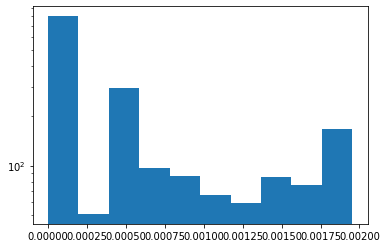

In [37]:
plt.hist(a.get_data()[:,0])
plt.yscale("log")

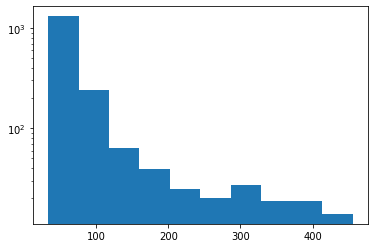

In [38]:
plt.hist(a.get_data()[:,1])
plt.yscale("log")

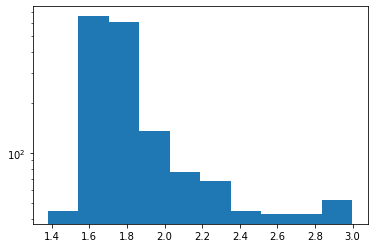

In [39]:
plt.hist(a.get_data()[:,2])
plt.yscale("log")

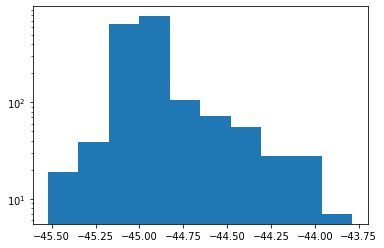

In [40]:
plt.hist(a.get_data()[:,3])
plt.yscale("log")

(array([ 1.,  0.,  3., 10.,  3., 14.,  9.,  5.,  0.,  1.]),
 array([-45.06261514, -45.05362469, -45.04463423, -45.03564377,
        -45.02665331, -45.01766286, -45.0086724 , -44.99968194,
        -44.99069148, -44.98170103, -44.97271057]),
 <a list of 10 Patch objects>)

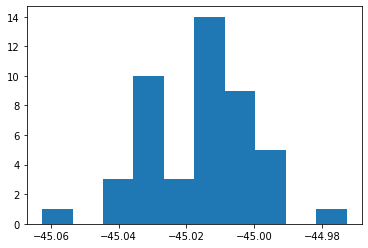

In [41]:
plt.hist(stats2.result['samples'][:,1])

In [42]:
stats2.save_results()

NestedSamplerStatModel::	2020-01-26T12:56
	getting the summary (or at least trying) let's first see if I did run
parameter values:
       log_mass : 1.719 +- 0.031
	 mass 52.3 +/- 3.7
log_cross_section : -45.016 +- 0.016
	 cross_section 9.64e-46 +/- 3.6e-47
save_results::	{now()}
	done_saving


In [43]:
stats2.log['saved_in']

'/mnt/c/Users/Joran/dddm_data/results/nested_multinest1/'

## Distribution of the DM ##
First we need to make a DM-rate spectrum

In [45]:
stats_full = dddm.NestedSamplerStatModel('Xe_migd')

stats_full.nlive = 200
stats_full.verbose = 1
stats_full.sampler = 'multinest'

StatModel::	2020-01-26T12:56
	initialized for Xe_migd detector.See print(stat_model) for default settings
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_230/vesc_544/rho_0.400/sig_-45.0_mx_1.70_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 49.99999999999999 -sigma_p 1e-45 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 230.00000000000003 -v_esc 544.0 -save_as "/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_230/vesc_544/rho_0.400/sig_-45.0_mx_1.70_avg.csv" 


In [46]:
stats_full.log
stats_full.set_prior('migdal_lower')

StatModel::	2020-01-26T12:57
	set_prior
StatModel::	2020-01-26T12:57
	reading priors


In [47]:
# for key in stats_full.log.keys():
#     stats_full.log[key] = False


In [48]:
stats_full.fit_parameters = stats_full.known_parameters

In [49]:
stats_full.check_spectrum()

StatModel::	2020-01-26T12:57
	evaluating
		<class 'DirectDmTargets.detector.DetectorSpectrum'>
	for mw = 49.99999999999999, 
	sig = 1e-45, 
	halo model = 
		shielded_shm and 
	detector = 
		{'material': 'Xe', 'type': 'migdal', 'exp': 25, 'cut_eff': 0.8, 'nr_eff': 0.5, 'E_thr': 1.4, 'location': 'XENON', 'res': <function det_res_XENON1T at 0x7f558a9174d0>, 'bg_func': <function migdal_background_XENON1T at 0x7f558a879b00>, 'exp_eff': 10.0, 'name': 'Xe_migd'}
StatModel::	2020-01-26T12:57
	looking for intermediate results
StatModel::	2020-01-26T12:57
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-50.00/log_s--45.00/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	2020-01-26T12:57
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-50.00/log_s--45.00/rho-0.55/v_0-233.0/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv


,counts,bin_centers,bin_left,bin_right
0,0.094984,0.5,0.0,1.0
1,0.260370,1.5,1.0,2.0
2,0.210565,2.5,2.0,3.0
3,0.083094,3.5,3.0,4.0
4,0.030944,4.5,4.0,5.0
5,0.013655,5.5,5.0,6.0
6,0.006866,6.5,6.0,7.0
7,0.003749,7.5,7.0,8.0
8,0.002123,8.5,8.0,9.0
9,0.001183,9.5,9.0,10.0


In [ ]:
start = time.time()
stats_full.run_multinest()
end = time.time()

NestedSamplerStatModel::	2020-01-26T12:57
	We made it to my core function, lets do that optimization
NestedSamplerStatModel::	2020-01-26T12:57
	here we go! We are going to fit:
	5 parameters

run_multinest::	2020-01-26T12:57
	start_fit for 5 parameters
NestedSamplerStatModel::	2020-01-26T12:57
	beyond this point, there is nothing I can say, you'll have to wait for my lower level algorithms to give you info, see you soon!
open_save_dir::	using /tmp/multinest0/
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T12:57
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.10/log_s--41.56/rho-0.58/v_0-235.5/v_esc-504/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_235/vesc_504/rho_0.579/sig_-41.6_mx_-1.01_avg.csv
Generating spectrum, this can tak



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T13:04
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.04/log_s--39.53/rho-0.57/v_0-228.5/v_esc-511/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T13:04
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.59/log_s--38.48/rho-0.54/v_0-241.4/v_esc-542/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_241/vesc_542/rho_0.537/sig_-38.5_mx_-0.23_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.5876248178894804 -sigma_p 3.2795413590407237e-39 -loc XENON -path "/



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T13:11
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.09/log_s--38.66/rho-0.65/v_0-235.5/v_esc-538/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T13:11
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.06/log_s--38.98/rho-0.42/v_0-234.9/v_esc-520/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_234/vesc_520/rho_0.425/sig_-39.0_mx_-1.25_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.055810131044489925 -sigma_p 1.0403494710983594e-39 -loc XENON -path 



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T13:18
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.78/log_s--39.37/rho-0.48/v_0-229.8/v_esc-557/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T13:18
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.58/log_s--41.35/rho-0.55/v_0-232.1/v_esc-519/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_232/vesc_519/rho_0.552/sig_-41.3_mx_-0.24_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.5819449567961921 -sigma_p 4.512143926137813e-42 -loc XENON -path "/h

StatModel::	2020-01-26T13:25
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-2.51/log_s--41.02/rho-0.53/v_0-230.2/v_esc-533/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T13:25
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.03/log_s--40.79/rho-0.56/v_0-233.0/v_esc-519/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_232/vesc_519/rho_0.562/sig_-40.8_mx_-1.48_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.03321491140786435 -sigma_p 1.6182980960591004e-41 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T13:31
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.16/log_s--41.35/rho-0.47/v_0-227.9/v_esc-556/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T13:31
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.26/log_s--40.55/rho-0.49/v_0-233.9/v_esc-545/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_233/vesc_545/rho_0.494/sig_-40.5_mx_-0.58_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.2609041685787317 -sigma_p 2.843930205149396e-41 -loc XENON -path "/h



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T13:39
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.26/log_s--41.02/rho-0.51/v_0-233.2/v_esc-525/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T13:39
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-6.52/log_s--40.06/rho-0.54/v_0-230.3/v_esc-537/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_230/vesc_537/rho_0.542/sig_-40.1_mx_0.81_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 6.521564547753321 -sigma_p 8.646323376260868e-41 -loc XENON -path "/hom

StatModel::	2020-01-26T13:46
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-7.98/log_s--39.30/rho-0.54/v_0-234.2/v_esc-535/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T13:46
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.77/log_s--39.83/rho-0.58/v_0-239.6/v_esc-524/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_239/vesc_524/rho_0.585/sig_-39.8_mx_-0.12_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.7666749066236331 -sigma_p 1.485547977837639e-40 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 23



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T13:55
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.04/log_s--41.14/rho-0.51/v_0-230.2/v_esc-507/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T13:55
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-7.15/log_s--39.32/rho-0.52/v_0-234.6/v_esc-566/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_234/vesc_566/rho_0.523/sig_-39.3_mx_0.85_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 7.148647902823585 -sigma_p 4.841438639781487e-40 -loc XENON -path "/hom



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T14:01
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.41/log_s--38.86/rho-0.51/v_0-232.1/v_esc-527/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T14:01
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.07/log_s--41.32/rho-0.55/v_0-228.5/v_esc-556/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_228/vesc_556/rho_0.551/sig_-41.3_mx_-1.16_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.06899633158848897 -sigma_p 4.794135622145223e-42 -loc XENON -path "/



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T14:10
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.02/log_s--39.48/rho-0.50/v_0-229.6/v_esc-514/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T14:10
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.01/log_s--39.78/rho-0.57/v_0-231.8/v_esc-551/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_231/vesc_551/rho_0.567/sig_-39.8_mx_-1.94_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.01141672210491759 -sigma_p 1.656127617838293e-40 -loc XENON -path "/

StatModel::	2020-01-26T14:17
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-2.77/log_s--39.74/rho-0.73/v_0-232.3/v_esc-518/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T14:17
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.04/log_s--41.83/rho-0.75/v_0-234.2/v_esc-487/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_234/vesc_487/rho_0.750/sig_-41.8_mx_-1.40_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.03966091631938306 -sigma_p 1.474094137380489e-42 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 2



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T14:25
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.21/log_s--39.69/rho-0.66/v_0-237.7/v_esc-539/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T14:25
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.02/log_s--38.35/rho-0.64/v_0-231.5/v_esc-562/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_231/vesc_562/rho_0.643/sig_-38.4_mx_0.01_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 1.0201456081395759 -sigma_p 4.4648559642087957e-39 -loc XENON -path "/h

StatModel::	2020-01-26T14:33
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-3.05/log_s--40.86/rho-0.55/v_0-234.8/v_esc-545/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T14:33
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.89/log_s--40.67/rho-0.40/v_0-232.6/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_232/vesc_528/rho_0.396/sig_-40.7_mx_-0.05_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.8896200535694562 -sigma_p 2.1478317381410793e-41 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 2



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T14:40
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.05/log_s--39.69/rho-0.49/v_0-235.9/v_esc-527/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T14:40
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.07/log_s--39.83/rho-0.53/v_0-233.5/v_esc-523/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_233/vesc_523/rho_0.532/sig_-39.8_mx_-1.17_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.06715286006497825 -sigma_p 1.4660125741506788e-40 -loc XENON -path "

StatModel::	2020-01-26T14:47
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-7.79/log_s--39.38/rho-0.55/v_0-236.5/v_esc-547/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T14:47
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.08/log_s--39.08/rho-0.58/v_0-230.1/v_esc-504/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_230/vesc_504/rho_0.576/sig_-39.1_mx_-1.11_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.07686890790091314 -sigma_p 8.352382765368206e-40 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 2



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T14:54
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.26/log_s--39.72/rho-0.60/v_0-231.0/v_esc-503/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T14:54
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.06/log_s--38.81/rho-0.48/v_0-234.6/v_esc-492/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_234/vesc_492/rho_0.483/sig_-38.8_mx_-1.24_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.0569226856596934 -sigma_p 1.5625427948771313e-39 -loc XENON -path "/

StatModel::	2020-01-26T15:01
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-8.83/log_s--39.83/rho-0.56/v_0-229.8/v_esc-525/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T15:01
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.08/log_s--38.94/rho-0.77/v_0-232.2/v_esc-533/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_232/vesc_533/rho_0.774/sig_-38.9_mx_-1.09_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.0817396530157638 -sigma_p 1.1488665747013094e-39 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 2

StatModel::	2020-01-26T15:08
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-2.67/log_s--40.50/rho-0.51/v_0-235.0/v_esc-491/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T15:08
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-6.47/log_s--38.72/rho-0.50/v_0-232.2/v_esc-513/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_232/vesc_513/rho_0.498/sig_-38.7_mx_0.81_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 6.471169325316077 -sigma_p 1.9109938892624354e-39 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 232



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T15:16
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.02/log_s--40.45/rho-0.59/v_0-235.8/v_esc-557/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T15:16
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.07/log_s--41.68/rho-0.63/v_0-235.1/v_esc-529/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_235/vesc_529/rho_0.629/sig_-41.7_mx_-1.16_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.06926257385081248 -sigma_p 2.0963386387951385e-42 -loc XENON -path "



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T15:23
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.28/log_s--40.90/rho-0.71/v_0-235.4/v_esc-565/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T15:23
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.52/log_s--39.04/rho-0.49/v_0-235.3/v_esc-535/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_235/vesc_535/rho_0.490/sig_-39.0_mx_-0.29_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.5161055317181739 -sigma_p 9.16845689430479e-40 -loc XENON -path "/ho



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T15:32
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.03/log_s--39.97/rho-0.50/v_0-235.5/v_esc-571/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T15:32
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-2.24/log_s--40.22/rho-0.48/v_0-231.2/v_esc-527/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_231/vesc_527/rho_0.479/sig_-40.2_mx_0.35_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 2.2407761888172977 -sigma_p 6.025942806009179e-41 -loc XENON -path "/ho



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T15:39
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.14/log_s--38.27/rho-0.49/v_0-232.4/v_esc-569/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T15:39
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.27/log_s--40.50/rho-0.66/v_0-238.6/v_esc-553/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_238/vesc_553/rho_0.660/sig_-40.5_mx_-0.57_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.27109384332814424 -sigma_p 3.149489990684614e-41 -loc XENON -path "/

StatModel::	2020-01-26T15:45
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-2.86/log_s--40.42/rho-0.55/v_0-236.1/v_esc-506/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T15:45
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-4.50/log_s--40.76/rho-0.47/v_0-232.4/v_esc-508/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_232/vesc_508/rho_0.475/sig_-40.8_mx_0.65_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 4.495864936309898 -sigma_p 1.7522731204455677e-41 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 232



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T15:51
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.05/log_s--41.62/rho-0.36/v_0-230.7/v_esc-524/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T15:51
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.14/log_s--41.09/rho-0.54/v_0-229.5/v_esc-511/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_229/vesc_511/rho_0.535/sig_-41.1_mx_0.06_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 1.143797629495779 -sigma_p 8.057355787055405e-42 -loc XENON -path "/hom



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T16:00
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.04/log_s--40.29/rho-0.47/v_0-232.9/v_esc-511/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T16:00
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.43/log_s--41.15/rho-0.71/v_0-232.1/v_esc-517/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_232/vesc_517/rho_0.712/sig_-41.1_mx_-0.37_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.42698179627752425 -sigma_p 7.135717729186924e-42 -loc XENON -path "/



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T16:07
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.06/log_s--38.16/rho-0.51/v_0-235.6/v_esc-549/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T16:07
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.13/log_s--40.02/rho-0.63/v_0-238.4/v_esc-562/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_238/vesc_562/rho_0.633/sig_-40.0_mx_-0.88_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.1315823043718372 -sigma_p 9.630874081426455e-41 -loc XENON -path "/h

StatModel::	2020-01-26T16:16
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-6.43/log_s--39.68/rho-0.58/v_0-231.1/v_esc-536/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T16:16
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.01/log_s--39.44/rho-0.76/v_0-236.0/v_esc-498/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_235/vesc_498/rho_0.760/sig_-39.4_mx_-1.90_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.012566842633925478 -sigma_p 3.625191393291061e-40 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T16:23
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.39/log_s--41.09/rho-0.51/v_0-230.6/v_esc-550/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T16:23
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.02/log_s--40.29/rho-0.37/v_0-233.2/v_esc-515/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_233/vesc_515/rho_0.373/sig_-40.3_mx_-1.75_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.017633043585171707 -sigma_p 5.126306098419403e-41 -loc XENON -path "



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T16:29
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.03/log_s--38.56/rho-0.56/v_0-237.4/v_esc-526/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T16:29
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.27/log_s--38.08/rho-0.52/v_0-239.0/v_esc-497/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_238/vesc_497/rho_0.521/sig_-38.1_mx_-0.56_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.2727343348516034 -sigma_p 8.372499663915569e-39 -loc XENON -path "/h



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T16:35
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.57/log_s--40.53/rho-0.48/v_0-231.5/v_esc-494/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T16:35
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.70/log_s--39.68/rho-0.56/v_0-229.4/v_esc-531/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_229/vesc_531/rho_0.565/sig_-39.7_mx_-0.15_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.7031491371368278 -sigma_p 2.1068479500614697e-40 -loc XENON -path "/



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T16:43
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.13/log_s--38.91/rho-0.52/v_0-227.8/v_esc-525/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T16:43
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.02/log_s--41.01/rho-0.53/v_0-236.6/v_esc-581/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_236/vesc_581/rho_0.526/sig_-41.0_mx_0.01_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 1.023886086088543 -sigma_p 9.734468506775482e-42 -loc XENON -path "/hom



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T16:52
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.16/log_s--39.15/rho-0.51/v_0-235.2/v_esc-540/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T16:52
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.54/log_s--40.13/rho-0.41/v_0-229.0/v_esc-529/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_228/vesc_529/rho_0.406/sig_-40.1_mx_-0.27_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.5416549130797748 -sigma_p 7.347460604526454e-41 -loc XENON -path "/h



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T16:59
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.02/log_s--39.54/rho-0.56/v_0-238.7/v_esc-504/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T16:59
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.25/log_s--39.01/rho-0.61/v_0-233.4/v_esc-542/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_233/vesc_542/rho_0.607/sig_-39.0_mx_-0.60_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.25380758524061414 -sigma_p 9.703309408615398e-40 -loc XENON -path "/



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T17:07
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.07/log_s--38.17/rho-0.60/v_0-238.3/v_esc-530/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T17:07
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.05/log_s--41.99/rho-0.57/v_0-230.4/v_esc-512/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_230/vesc_512/rho_0.566/sig_-42.0_mx_-1.28_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.0521364777774356 -sigma_p 1.0333834077882697e-42 -loc XENON -path "/

StatModel::	2020-01-26T17:13
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-4.01/log_s--41.32/rho-0.38/v_0-236.2/v_esc-522/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T17:13
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.05/log_s--40.88/rho-0.63/v_0-228.9/v_esc-562/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_228/vesc_562/rho_0.629/sig_-40.9_mx_-1.33_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.04629617446039776 -sigma_p 1.3312429661697117e-41 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T17:20
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.03/log_s--39.55/rho-0.50/v_0-237.4/v_esc-536/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T17:20
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.21/log_s--39.39/rho-0.53/v_0-235.4/v_esc-545/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_235/vesc_545/rho_0.529/sig_-39.4_mx_-0.67_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.21444144374939836 -sigma_p 4.069516809189292e-40 -loc XENON -path "/

StatModel::	2020-01-26T17:28
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-7.07/log_s--41.20/rho-0.47/v_0-233.0/v_esc-492/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T17:28
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.02/log_s--41.37/rho-0.39/v_0-235.1/v_esc-511/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_235/vesc_511/rho_0.393/sig_-41.4_mx_-1.69_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.02020181629678461 -sigma_p 4.251595708314785e-42 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 2

StatModel::	2020-01-26T17:34
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-2.65/log_s--39.75/rho-0.59/v_0-230.4/v_esc-542/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T17:34
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-4.62/log_s--38.44/rho-0.61/v_0-232.7/v_esc-509/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_232/vesc_509/rho_0.608/sig_-38.4_mx_0.66_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 4.618210373294634 -sigma_p 3.6512000356929467e-39 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 232

StatModel::	2020-01-26T17:41
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-5.95/log_s--39.96/rho-0.34/v_0-230.6/v_esc-551/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T17:41
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.55/log_s--38.97/rho-0.51/v_0-230.8/v_esc-509/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_230/vesc_509/rho_0.506/sig_-39.0_mx_0.19_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 1.5458155252395722 -sigma_p 1.0814402823690516e-39 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 23



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T17:48
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.13/log_s--41.95/rho-0.56/v_0-229.1/v_esc-522/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T17:48
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-5.48/log_s--40.39/rho-0.72/v_0-229.3/v_esc-571/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_229/vesc_571/rho_0.721/sig_-40.4_mx_0.74_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 5.482026530842967 -sigma_p 4.0428603298881987e-41 -loc XENON -path "/ho



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T17:54
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.18/log_s--41.80/rho-0.55/v_0-232.0/v_esc-529/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T17:54
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.48/log_s--38.35/rho-0.59/v_0-234.5/v_esc-491/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_234/vesc_491/rho_0.588/sig_-38.3_mx_0.17_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 1.4767974744466748 -sigma_p 4.5118863179456835e-39 -loc XENON -path "/h



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T18:01
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.02/log_s--39.91/rho-0.59/v_0-230.6/v_esc-538/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T18:01
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-1.51/log_s--38.36/rho-0.66/v_0-234.5/v_esc-524/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_234/vesc_524/rho_0.660/sig_-38.4_mx_0.18_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 1.508383587906038 -sigma_p 4.366796411999159e-39 -loc XENON -path "/hom

StatModel::	2020-01-26T18:09
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-8.85/log_s--38.08/rho-0.53/v_0-232.7/v_esc-494/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T18:09
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.03/log_s--40.30/rho-0.62/v_0-231.6/v_esc-513/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_231/vesc_513/rho_0.621/sig_-40.3_mx_-1.54_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.02900757078177239 -sigma_p 4.989551001745631e-41 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 2

StatModel::	2020-01-26T18:15
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-2.72/log_s--41.11/rho-0.65/v_0-230.5/v_esc-526/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T18:15
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.71/log_s--41.23/rho-0.67/v_0-233.9/v_esc-500/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_233/vesc_500/rho_0.668/sig_-41.2_mx_-0.15_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.7141006164761143 -sigma_p 5.933632911871524e-42 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0 23



----
finding negative rates. Doing hard override!!
----


StatModel::	2020-01-26T18:22
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.17/log_s--41.96/rho-0.38/v_0-232.8/v_esc-517/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T18:22
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-9.25/log_s--39.89/rho-0.68/v_0-236.8/v_esc-473/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_236/vesc_473/rho_0.677/sig_-39.9_mx_0.97_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 9.247563441979755 -sigma_p 1.2824187005316014e-40 -loc XENON -path "/ho

StatModel::	2020-01-26T18:28
	saving spectrum at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-6.64/log_s--41.92/rho-0.80/v_0-230.3/v_esc-533/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv
StatModel::	eval_spectrum	load results from intermediate file
StatModel::	2020-01-26T18:28
	data at /mnt/c/Users/Joran/dddm_data/spectra//nbin-10/model-shielded_shm/mw-0.01/log_s--41.84/rho-0.45/v_0-235.5/v_esc-528/poisson_0/spectrum_Xe_migdal_25_0.8_0.5_1.4_XENON_10.0_Xe_migd.csv = False
StatModel::	eval_spectrum	No file found, proceed and save intermediate result later
No spectrum found at:
/mnt/c/Users/Joran/dddm_data/verne/f_params/loc_XENON/v0_235/vesc_528/rho_0.451/sig_-41.8_mx_-1.84_avg.csv
Generating spectrum, this can take a minute. Execute:
python "/home/joran/google_drive/windows-anaconda/verne/"/src/CalcVelDist.py -m_x 0.014314314017620502 -sigma_p 1.4389660152253584e-42 -loc XENON -path "/home/joran/google_drive/windows-anaconda/verne//src/" -v_0

In [ ]:
end-start

In [ ]:
stats_full.save_results()

In [ ]:
9170.64813709259/3600

In [ ]:
assert stats_full.log['did_run']

In [ ]:
stats_full.show_walkers()

In [ ]:
stats_full.show_corner()

In [ ]:
corner.corner(
    stats_full.sampler.get_chain(
        flat=True,
        thin = 50,
        discard=int(stats_full.nsteps * 0.2)
    ),
              labels=stats_full.fit_parameters);